In [2]:

import cv2
import json
from src.lib.utils.pnp.cuboid_pnp_shell import pnp_shell
import matplotlib.pyplot as plt
import numpy as np
from src.lib.opts import opts
from itertools import permutations
import copy
import math


In [45]:
opt = opts()
opt.nms = True
opt.obj_scale = True
opt.c = "cereal_box" # category

print(opt.nms, opt.obj_scale )

True True


In [56]:
# Take GT as imput:
with open('data/synthetic_data/anno.json', 'r') as f:
    data = json.load(f)

syn_gt = data[1]

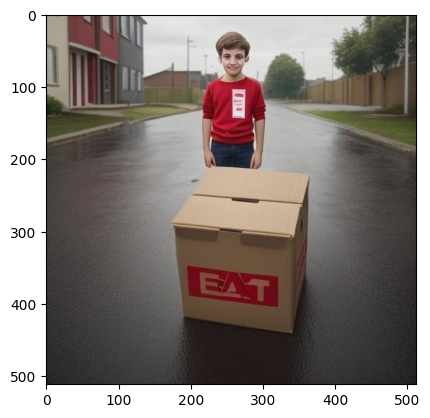

In [57]:
# first test with GT cereal:
size = syn_gt["whd"]
points = syn_gt["projection"]
points = [points[3], points[0], points[7], points[4], points[2], points[1], points[6], points[5], points[8]]
img = plt.imread("data/synthetic_data/train/1.jpg")
plt.imshow(img)
plt.show()

In [58]:
camera_cereal=np.array([[663.0287679036459, 0, 300.2775065104167], [0, 663.0287679036459, 395.00066121419275], [0, 0, 1]])
camera_ford=np.array([[3648, 0, 2736], [0, 3648, 1824], [0, 0, 1]], dtype=np.float32)

In [63]:
print(size)
bbox= {'kps': points, "obj_scale": size}
meta={"width": img.shape[1],"height": img.shape[0], "camera_matrix":camera_cereal }

[0.9377306153824058, 1, 0.9807195867197663]


In [65]:
projected_points, point_3d_cam, scale, points_ori, bbox=pnp_shell(opt, meta, bbox, points, size, OPENCV_RETURN=False)

TypeError: cannot unpack non-iterable NoneType object

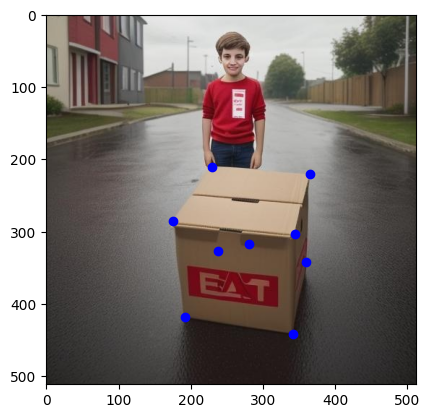

In [66]:
# print("projected_points", projected_points)
# print(point_3d_cam)
# print(scale)
# print(points_ori) # empty

plt.imshow(img)
# for p in bbox["projected_cuboid"]:
#      plt.plot(p[0],p[1], 'ro')
for p in points:
     plt.plot(p[0],p[1], 'bo')
plt.show()

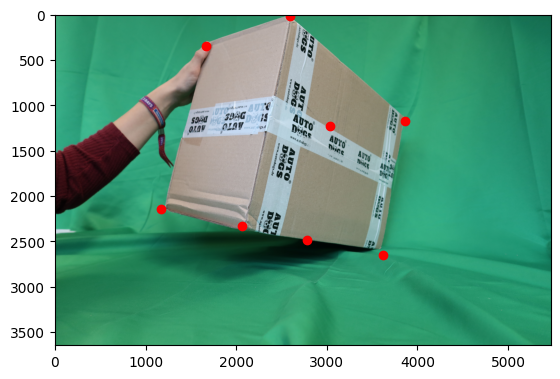

In [31]:
# first test with GT me:
img=plt.imread("data/outf_all/validation/"+gt3["image_name"])
plt.imshow(img)


h=img.shape[0]
size=gt3["size"]
points=gt3["points"]
# invert points: 
for i, p in enumerate(points):
    points[i]=[p[0], h-p[1]]


for p in points[1:]:
    plt.plot(p[0],p[1], 'ro')
plt.show()
points=points[1:]


In [32]:
def dist(pnp, anno):
    distance=0
    for a, p in zip(pnp, anno):
        distance+=math.dist(a, p)
    return distance

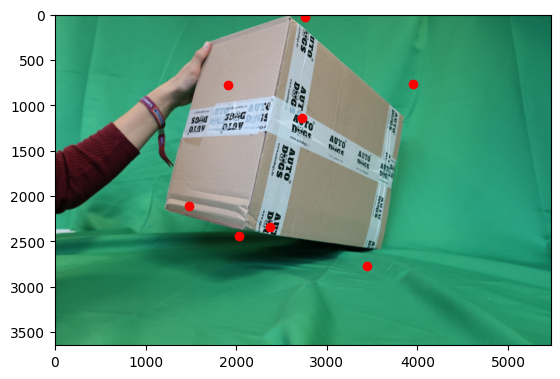

In [36]:
bbox= {'kps': points, "obj_scale": size}
meta={"width": img.shape[1],"height": img.shape[0], "camera_matrix":camera_ford }
projected_points, point_3d_cam, scale, points_ori, bbox=pnp_shell(opt, meta, bbox, points, size, OPENCV_RETURN=False)
for p in bbox["projected_cuboid"]:
    plt.plot(p[0], p[1], 'ro')
plt.imshow(img)
plt.show()

In [33]:

correct_dim=0
big_value=10000000
big_size_list=(list(permutations(size)))
for size in big_size_list:
    bbox= {'kps': points, "obj_scale": size}
    meta={"width": img.shape[1],"height": img.shape[0], "camera_matrix":camera_ford }
    projected_points, point_3d_cam, scale, points_ori, bbox=pnp_shell(opt, meta, bbox, points, size, OPENCV_RETURN=False)
    d=dist(bbox["projected_cuboid"], points)
    if d < big_value:
        big_value=d
        correct_dim=size

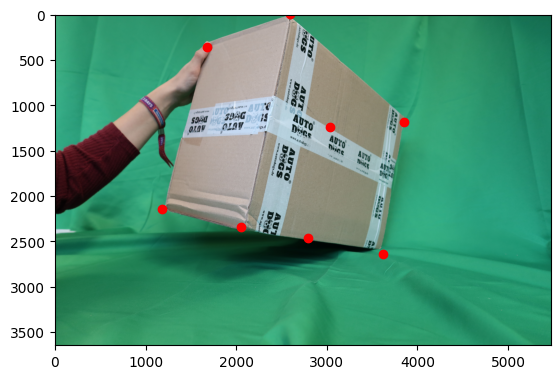

In [34]:
bbox= {'kps': points, "obj_scale": correct_dim}
meta={"width": img.shape[1],"height": img.shape[0], "camera_matrix":camera_ford }
projected_points, point_3d_cam, scale, points_ori, bbox=pnp_shell(opt, meta, bbox, points, correct_dim, OPENCV_RETURN=False)
for p in bbox["projected_cuboid"]:
    plt.plot(p[0], p[1], 'ro')
plt.imshow(img)
plt.show()


In [35]:
print(bbox)

{'kps': [[1175, 2145], [2061, 2328], [1663, 342], [2596, 19], [2786, 2481], [3619, 2654], [3037, 1227], [3863, 1175]], 'obj_scale': (395, 300, 208), 'location': [-0.13838556519482778, -0.007090665791722066, -2.1708010014689694], 'quaternion_xyzw': Quaternion([-0.31471569,  0.27050513,  0.54841405,  0.72596353]), 'projected_cuboid': array([[1181.60337844, 2147.34986909],
       [2052.43584384, 2341.36383896],
       [1673.5378772 ,  351.65919009],
       [2599.02299521,   -5.27298292],
       [2792.6800085 , 2467.24078033],
       [3615.04940053, 2642.90363494],
       [3036.25227068, 1242.89856934],
       [3850.22440917, 1185.5879702 ]]), 'kps_3d_cam': array([[-0.13838557, -0.00709067, -2.170801  ],
       [ 0.16239528, -0.78066115, -1.83212692],
       [ 0.19537348, -0.25813614, -1.37760391],
       [-0.80412632, -0.58026902, -1.99237351],
       [-0.77114813, -0.05774401, -1.53785051],
       [ 0.494377  ,  0.04356268, -2.8037515 ],
       [ 0.52735519,  0.56608769, -2.34922849],
  